# AUC

In [75]:
%matplotlib notebook

1quarter_relevance_3quarters_uncertainty                    :o
relevance                                                   :v
relevance_with_min_diversity                                :^
relevance_with_avg_diversity                                :<
uncertainty_with_min_diversity                              :>
half_relevance_half_uncertainty                             :1
uncertainty                                                 :s
uncertainty_with_avg_diversity                              :P
3quarter_relevance_1quarters_uncertainty                    :*


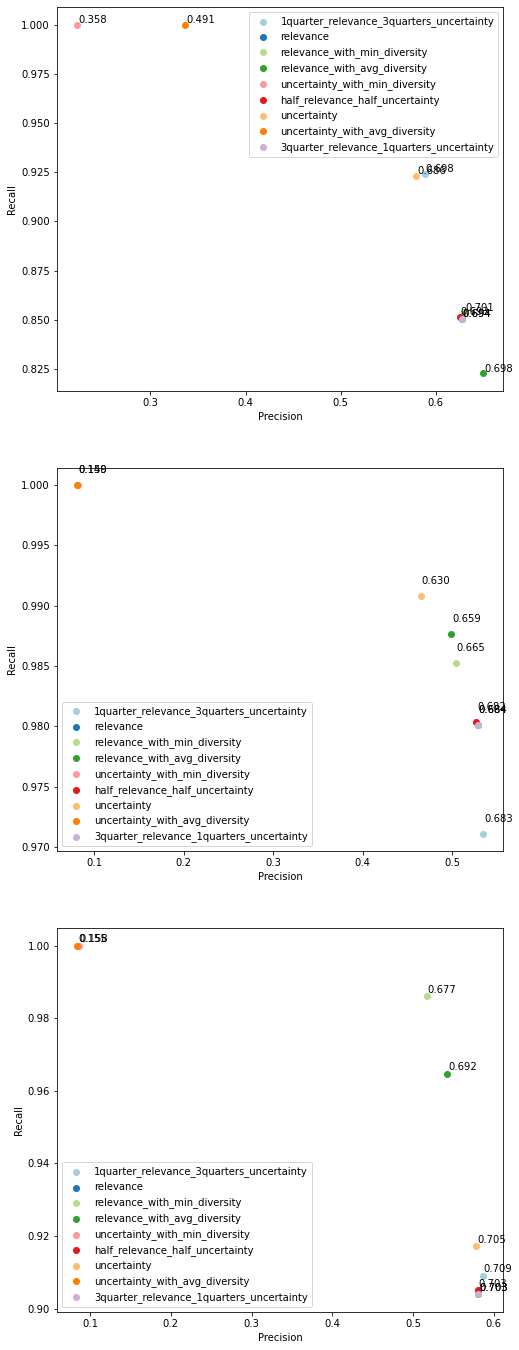

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

displaced_person_file = '/home/ec2-user/SageMaker/mariano/datasets/displaced_persons/simulation_results/auc_results.csv'
newsgroup20_file = '/home/ec2-user/SageMaker/mariano/datasets/20news-18828/simulation_results/auc_results.csv'
assert os.path.isfile(displaced_person_file) and  os.path.isfile(newsgroup20_file)

df = pd.read_csv(displaced_person_file)

ranking_functions = list(set(df['Ranking Function']))
models = sorted(list(set(df['Model'])))
representations = sorted(list(set(df['representation'])))


fig, ax = plt.subplots(3, figsize=(8, 24))    


representation2ax = {'bow': ax[0],
                     'sbert': ax[1],
                     'glove': ax[2],
                     }

colors = [(166,206,227),
          (31,120,180),
          (178,223,138),
          (51,160,44),
          (251,154,153),
          (227,26,28),
          (253,191,111),
          (255,127,0),
          (202,178,214)
         ]

colors = [(r/255, g/255, b/255) for (r,g,b) in colors]
representation2color={'bow':'blue', 'sbert':'red', 'glove': 'black'}
markers = ['o', 'v', '^', '<', '>', '1', 's', 'P', '*']
rf2color = {rf:color for rf, color in zip(ranking_functions, colors)}

for rf in rf2marker:
    print(f'{rf:60}:{rf2marker[rf]}')

visited=set()
for ranking_function in ranking_functions:
    for model in models[0:1]:
        for representation in representations:
            mask=(df['Model']==model) & (df['representation']==representation) & (df['Ranking Function']==ranking_function)
            auxdf = df[mask]
            precision = auxdf['Precision']
            recall = auxdf['Recall']
            f1 = auxdf['F1-Score']
            representation2ax[representation].scatter([precision], [recall], 
#                                                        marker=rf2marker[ranking_function],
                                                       color=rf2color[ranking_function],
                                                       label=ranking_function,
                                                      )
            for p,r,f in zip(precision,recall,f1):
                representation2ax[representation].text(x=p+0.001, y=r+0.001, s=f'{f:4.3f}')
                
ax[0].set_ylabel('Recall')
ax[1].set_ylabel('Recall')
ax[2].set_ylabel('Recall')
ax[0].set_xlabel('Precision')
ax[1].set_xlabel('Precision')
ax[2].set_xlabel('Precision')
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [58]:
df.columns

Index(['Unnamed: 0', 'representation', 'Model', 'Ranking Function', 'Accuracy',
       'Precision', 'Recall', 'F1-Score'],
      dtype='object')


# NO AUC

In [6]:
displaced_person_file = '/home/ec2-user/SageMaker/mariano/datasets/displaced_persons/simulation_results/all_results_final.csv'
newsgroup20_file = '/home/ec2-user/SageMaker/mariano/datasets/20news-18828/simulation_results/all_results_v2.csv'

In [10]:
import pandas as pd
df = pd.read_csv(displaced_person_file)

df.head()

,Date,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,representation
0,2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
1,2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2,2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
3,2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
4,2022-11-23 17:41,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow


In [11]:
df[['N','n', 'Effort']]

,N,n,Effort
0,364,1,23
1,364,1,23
2,364,1,23
3,364,1,23
4,364,1,23
...,...,...,...
9445,7282,20,850
9446,7282,20,850
9447,7282,20,850
9448,7282,20,850


In [15]:
count = 0
for effort in set(df['Effort']):
    auxdf = df[df['Effort']==effort]
    count+=len(auxdf)
count

9450

(5, 19)

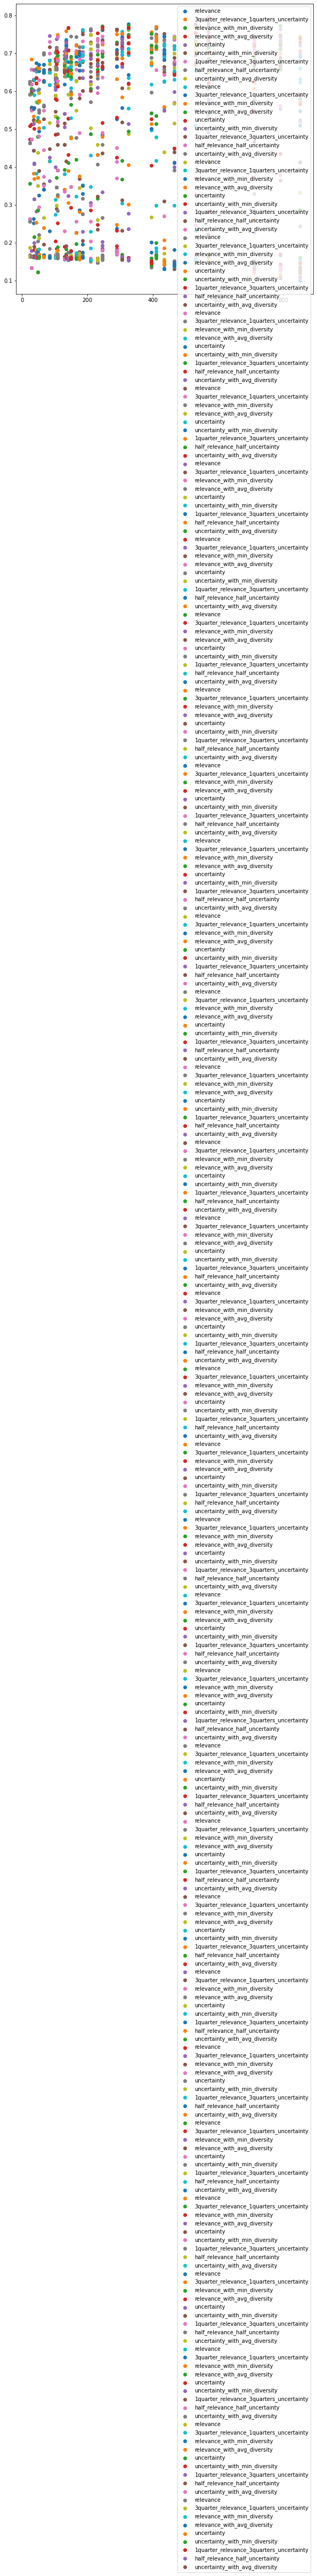

In [51]:
import matplotlib.pyplot as plt
import numpy as np

ranking_functions = list(set(df['Ranking Function']))
efforts = sorted(list(set(df['Effort'])))
models = sorted(list(set(df['Model'])))
representations = sorted(list(set(df['representation'])))
fig, ax = plt.subplots(1, figsize=(10,10))    

for effort in efforts:
    for ranking_function in ranking_functions:
        f1s=[]
        for model in models:
            for representation in representations:
                mask = (df['Model']==model) & (df['representation']==representation) & \
                (df['Effort']==effort) & (df['Ranking Function']==ranking_function)
                auxdf=df[mask]
                f1s.append(np.average(auxdf['F1-Score']))
        ax.scatter([effort]*len(f1s), f1s, label=ranking_function)
        
#                 assert auxdf.shape[0]==5 or auxdf.shape[0]==10
ax.legend()
auxdf.shape

In [27]:
df.columns

Index(['Date', 'Seed', 'Model', 'Ranking Function', 'Dataset', 'N', 'n',
       'Effort', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
       'Relevant labeled', 'TP', 'TN', 'FP', 'FN', 'Prevalence',
       'representation'],
      dtype='object')

In [20]:
sorted([4,1,2,3])

[1, 2, 3, 4]